In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/AI/Data Analysis/student_performace/customer_behavior/customer_be.csv", delimiter=';')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,"churn,,,,"
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,"0,"
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,"0,"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.isnull().sum()

,0
account length,0
location code,0
user id,0
credit card info save,0
push status,0
add to wishlist,0
desktop sessions,0
app sessions,0
desktop transactions,0
total product detail views,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn,,,,'],
      dtype='object')

In [13]:
df['avg order value'] = df['avg order value'].replace(',', '.', regex=True).astype(float)
df['discount rate per visited products'] = df['discount rate per visited products'].replace(',', '.', regex=True).astype(float)
df['add to cart per session'] = df['add to cart per session'].replace(',', '.', regex=True).astype(float)
df['product detail view per app session'] = df['product detail view per app session'].replace(',', '.', regex=True).astype(float)


df.dtypes

,0
account length,int64
location code,int64
user id,int64
credit card info save,object
push status,object
add to wishlist,int64
desktop sessions,int64
app sessions,int64
desktop transactions,int64
total product detail views,int64


In [14]:
df.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [15]:
df.describe(exclude= ['int', 'float'])

,credit card info save,push status,"churn,,,,"
count,3333,3333,3333
unique,2,2,7
top,no,no,0
freq,3010,2411,2200


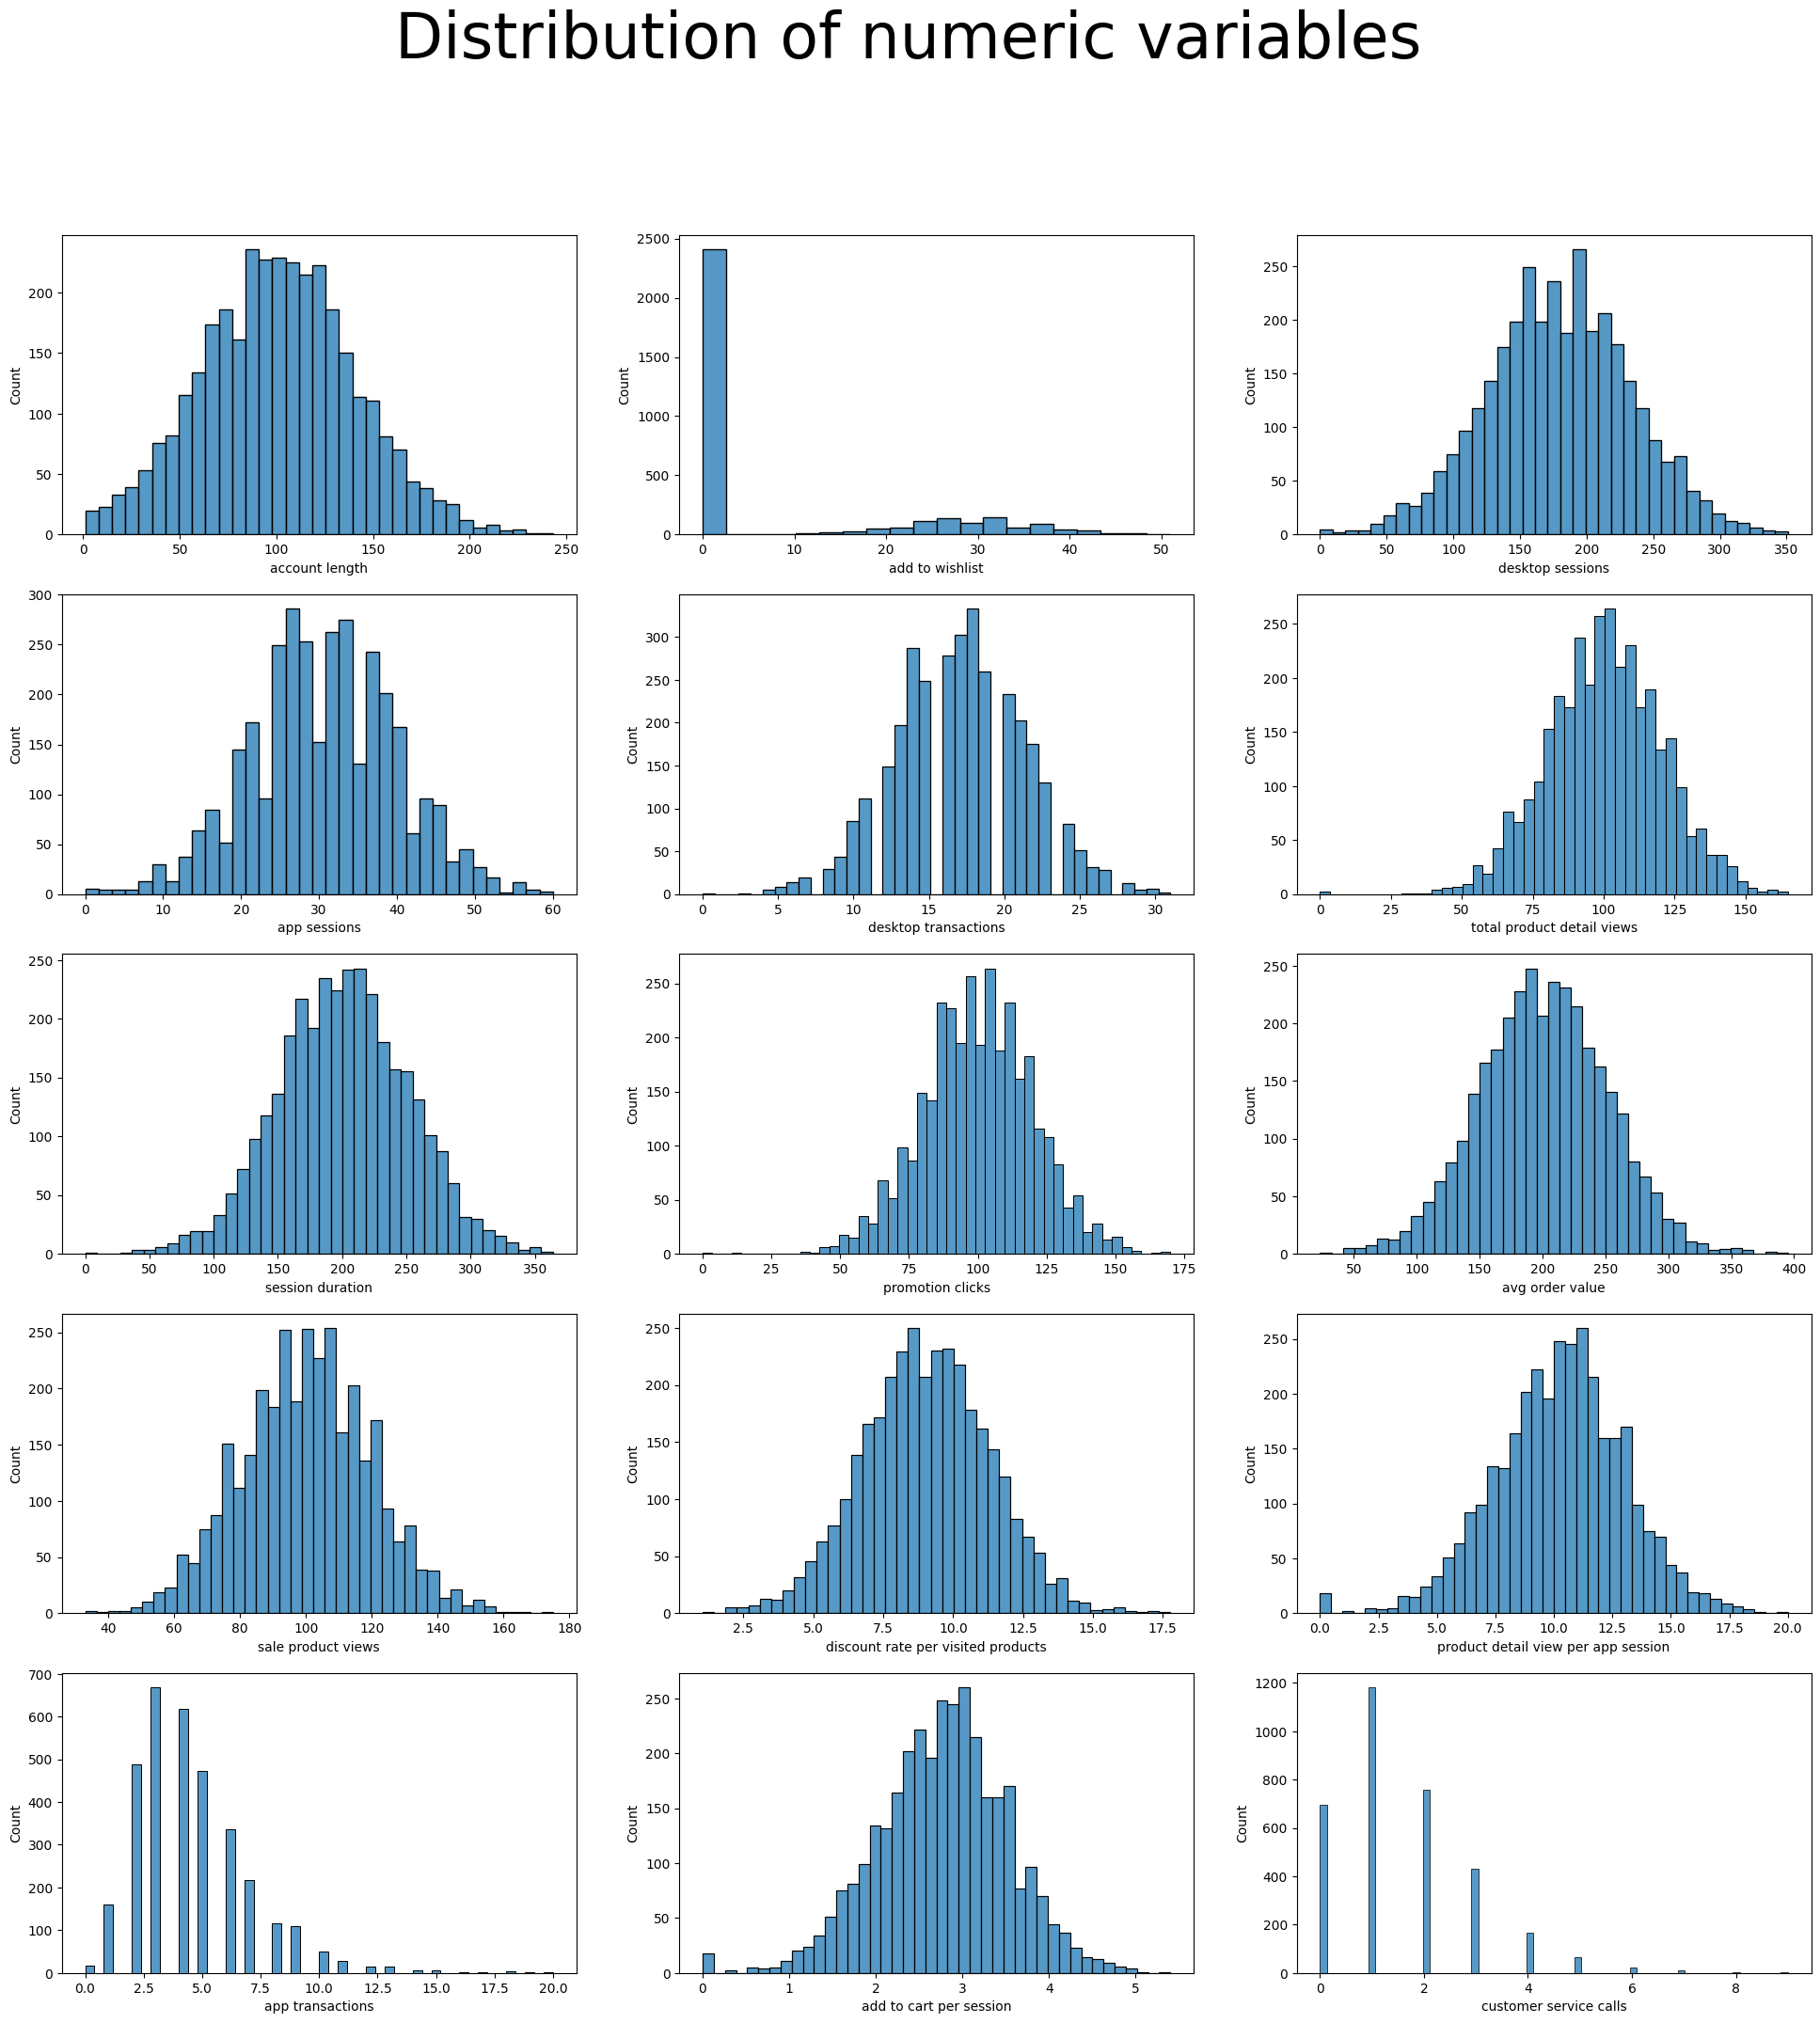

In [17]:
numeric_columns = ['account length', 'add to wishlist', 'desktop sessions', 'app sessions',
                   'desktop transactions', 'total product detail views', 'session duration',
                   'promotion clicks', 'avg order value', 'sale product views',
                   'discount rate per visited products', 'product detail view per app session',
                   'app transactions', 'add to cart per session', 'customer service calls']


fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of numeric variables", size=48)

for i in range(5):
    for j in range(3):
        sns.histplot(df[numeric_columns[3*i+j]], ax=axes[i,j])

In [21]:
print(df.columns.tolist())

['account length', 'location code', 'user id', 'credit card info save', 'push status', 'add to wishlist', 'desktop sessions', 'app sessions', 'desktop transactions', 'total product detail views', 'session duration', 'promotion clicks', 'avg order value', 'sale product views', 'discount rate per visited products', 'product detail view per app session', 'app transactions', 'add to cart per session', 'customer service calls', 'churn,,,,']


In [22]:
df.rename(columns={"churn,,,,,": "churn"}, inplace=True)


In [24]:
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).str.strip().str.lower()



In [30]:
print(df['churn'].value_counts())
print(df['churn'].unique())

churn
0       2200
0,       594
1        369
1,       104
0,,       55
1,,       10
0,,,       1
Name: count, dtype: int64
['0,' '0' '1' '1,' '0,,' '1,,' '0,,,']


In [33]:
# Remove commas and whitespace
df['churn'] = df['churn'].astype(str).str.replace(',', '').str.strip()

# Convert to integer (will now just be 0 or 1)
df['churn'] = df['churn'].astype(int)

/tmp/ipython-input-4239177457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp = sns.countplot(x= df['churn'], ax = ax[0], palette = 'husl')


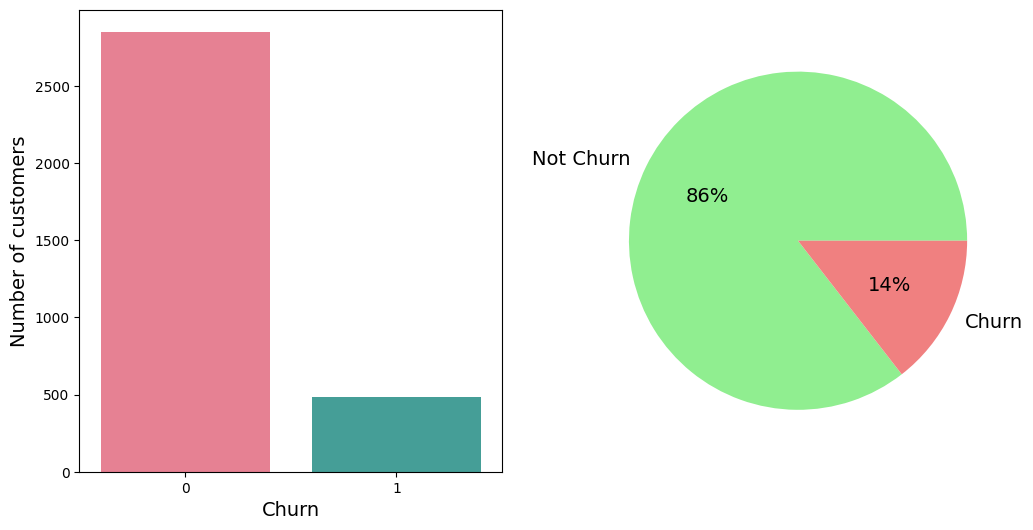

In [34]:

fig, ax = plt.subplots(1,2,figsize= (12,6))

plt.pie(df.churn.value_counts(), labels = ["Not Churn", "Churn"], colors = ["lightgreen", "lightcoral"], autopct='%.0f%%', textprops={'fontsize': 14})

cp = sns.countplot(x= df['churn'], ax = ax[0], palette = 'husl')

cp.set_xlabel("Churn", fontsize=14)

cp.set_ylabel("Number of customers", fontsize=14)

plt.show()


In [36]:
print(df.columns.tolist())


['accountlength', 'locationcode', 'userid', 'creditcardinfosave', 'pushstatus', 'addtowishlist', 'desktopsessions', 'appsessions', 'desktoptransactions', 'totalproductdetailviews', 'sessionduration', 'promotionclicks', 'avgordervalue', 'saleproductviews', 'discountratepervisitedproducts', 'productdetailviewperappsession', 'apptransactions', 'addtocartpersession', 'customerservicecalls', 'churn']


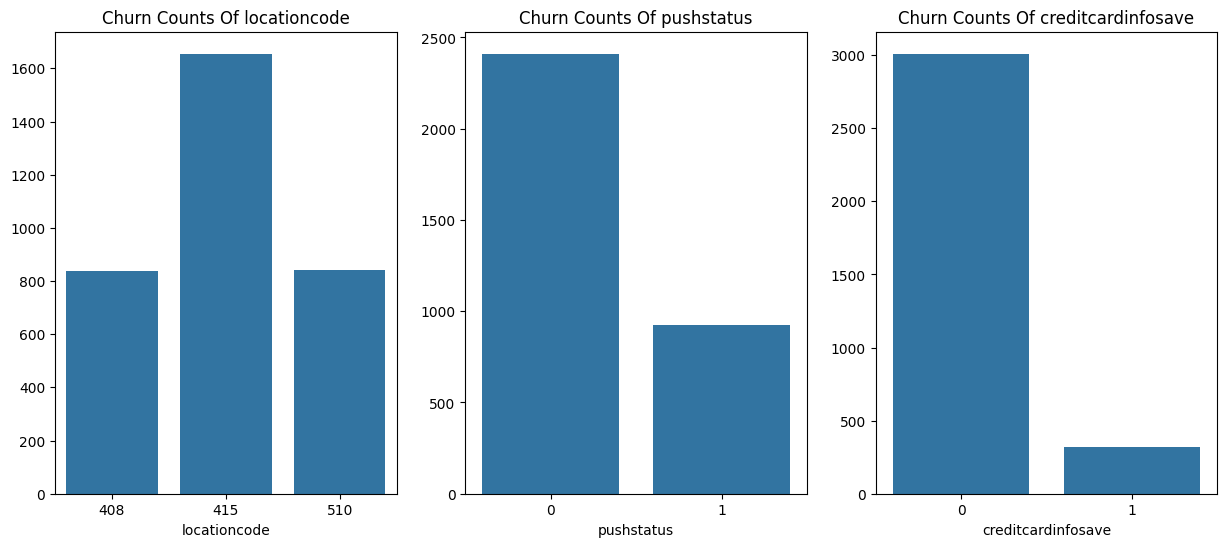

In [38]:
categorical_columns = ["locationcode","pushstatus","creditcardinfosave"]

for i in df.select_dtypes(include = ['object']).columns.values:
    df[i] = df[i].replace(["yes", "no"],[1, 0])

fig, ax = plt.subplots(1, len(categorical_columns), figsize = (15, 6))
for i, a in zip(categorical_columns, ax):
    temp = df[i].value_counts()
    a.set_title("Churn Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values)
plt.show()